<a href="https://colab.research.google.com/github/psGitOrange/Aerofit-Target-Audience-Probability-Statistics/blob/main/Aerofit_treadmill_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Treadmill Data - Visualization x Probability & Statistics

### **About Aerofit**
**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as **treadmills, exercise bikes, gym equipment, and fitness accessories** to cater to the needs of all categories of people.

<img src="https://hips.hearstapps.com/hmg-prod/images/treadmill-testing-0367-1578930314.jpg" alt="treadmill_img" width="720" height="400">



**Business Problem**

The market research team at AeroFit wants to **identify the characteristics** of the **target audience** for each **type of treadmill** offered by the company, to provide a better **recommendation** of the treadmills to the **new customers**. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1) Perform `descriptive analytics` to create a **customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.

2) For each AeroFit treadmill product, construct two-way `contingency tables` and compute all `conditional` and `marginal` probabilities along with their **insights/impact** on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: [Aerofit_treadmill.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

Product Purchased: *KP281, KP481, or KP781* </br>
Age:	             In years</br>
Gender:	           Male/Female</br>
Education:	       In years</br>
MaritalStatus:	   Single or partnered</br>
Usage:	           The average number of times the customer plans to                 use the treadmill each week.</br>
Income:	           Annual income (in $)</br>
Fitness:	         Self-rated fitness on a 1-to-5 scale, where 1 is the poor               shape and 5 is the excellent shape.</br>
Miles:	           The average number of miles the customer expects to walk/run each week</br>

### Aerofit data - Overview

In [ ]:
# Data processing
import pandas as pd
import numpy as np

In [ ]:
# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# from wordcloud import WordCloud

In [ ]:
#Let us load Netflix dataset
aerofit_df = pd.read_csv('aerofit_treadmill.txt')
aerofit_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
aerofit_df.shape

(180, 9)

In [ ]:
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Product Portfolio:**
The **KP281** is an entry-level treadmill that sells for **\$1,500** .
The **KP481** is for mid-level runners that sell for **\$1,750**.
The **KP781** treadmill is having advanced features that sell for **\$2,500**.

**Dataset:**
Aerofit treadmill data contains `180 rows and 9 feature columns` for products

The Columns are `Product, Age, Gender, Education, Marital, Status, Usage, Fitness, Income, and Miles`

There are `no null` values present in the dataset.

#### y data profiling (pandas profiling)

> Works well for initial data screening

`y-data profiling` is a python library used for quick analysis on the data. with a HTML rendered page, for interactions with data.
It provide an overview of data, i.e. number of variables, observations , missing values , duplicate rows and the total size.

It provides overview of each variable, with count plot or bar plot for categorical data and histogram plot for variable data giving a quick visualisation on range and distribution of each variables.

It also provide pair plots for numerical variables we could interact with this to get correlation between different sets of variables. E.g: age vs miles, age vs usage.

It provides a correlation between all the variable in the form of heat map and table, this helps understand the relation between each variable.

It provides number of missing values for each variable, in this there are none.

It also provides sample data we can view the first 10 or the last 10 rows of all data.

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(aerofit_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Basics Metrics
Lets first view the proportion of each type of treadmill sold.

In [ ]:
crosstab_product = pd.crosstab(index=aerofit_df['Product'], columns='count').reset_index()
crosstab_product

col_0,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


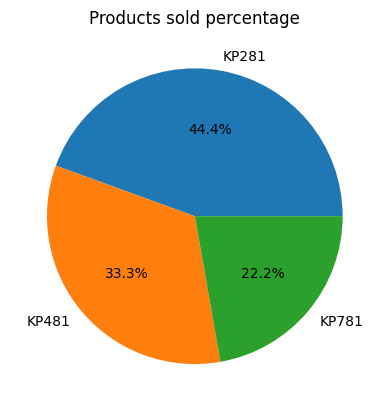

In [ ]:
plt.pie(x='count', labels='Product',autopct='%1.1f%%', data=crosstab_product)
plt.title('Products sold percentage')
plt.show()

Total 80 unit was sold of KP281 which is 44.4% of the all the treadmill sold.

Total 60 unit was sold of KP481 which is 33.3% of the all the treadmill sold.

The 40 unit of KP781 was sold which is 22.2% of the all the treadmill sold.

In [ ]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
print("Genders :",  aerofit_df.Gender.unique())
print("MaritalStatus :",  aerofit_df.MaritalStatus.unique())

Genders : ['Male' 'Female']
MaritalStatus : ['Single' 'Partnered']


We can view the range and distribution of numerical variables, Unique values of categorical variables.

Distribution of all numerical data is slightly skewed to the left (i.e. mean is less than the median), except Education.

### Pairplots

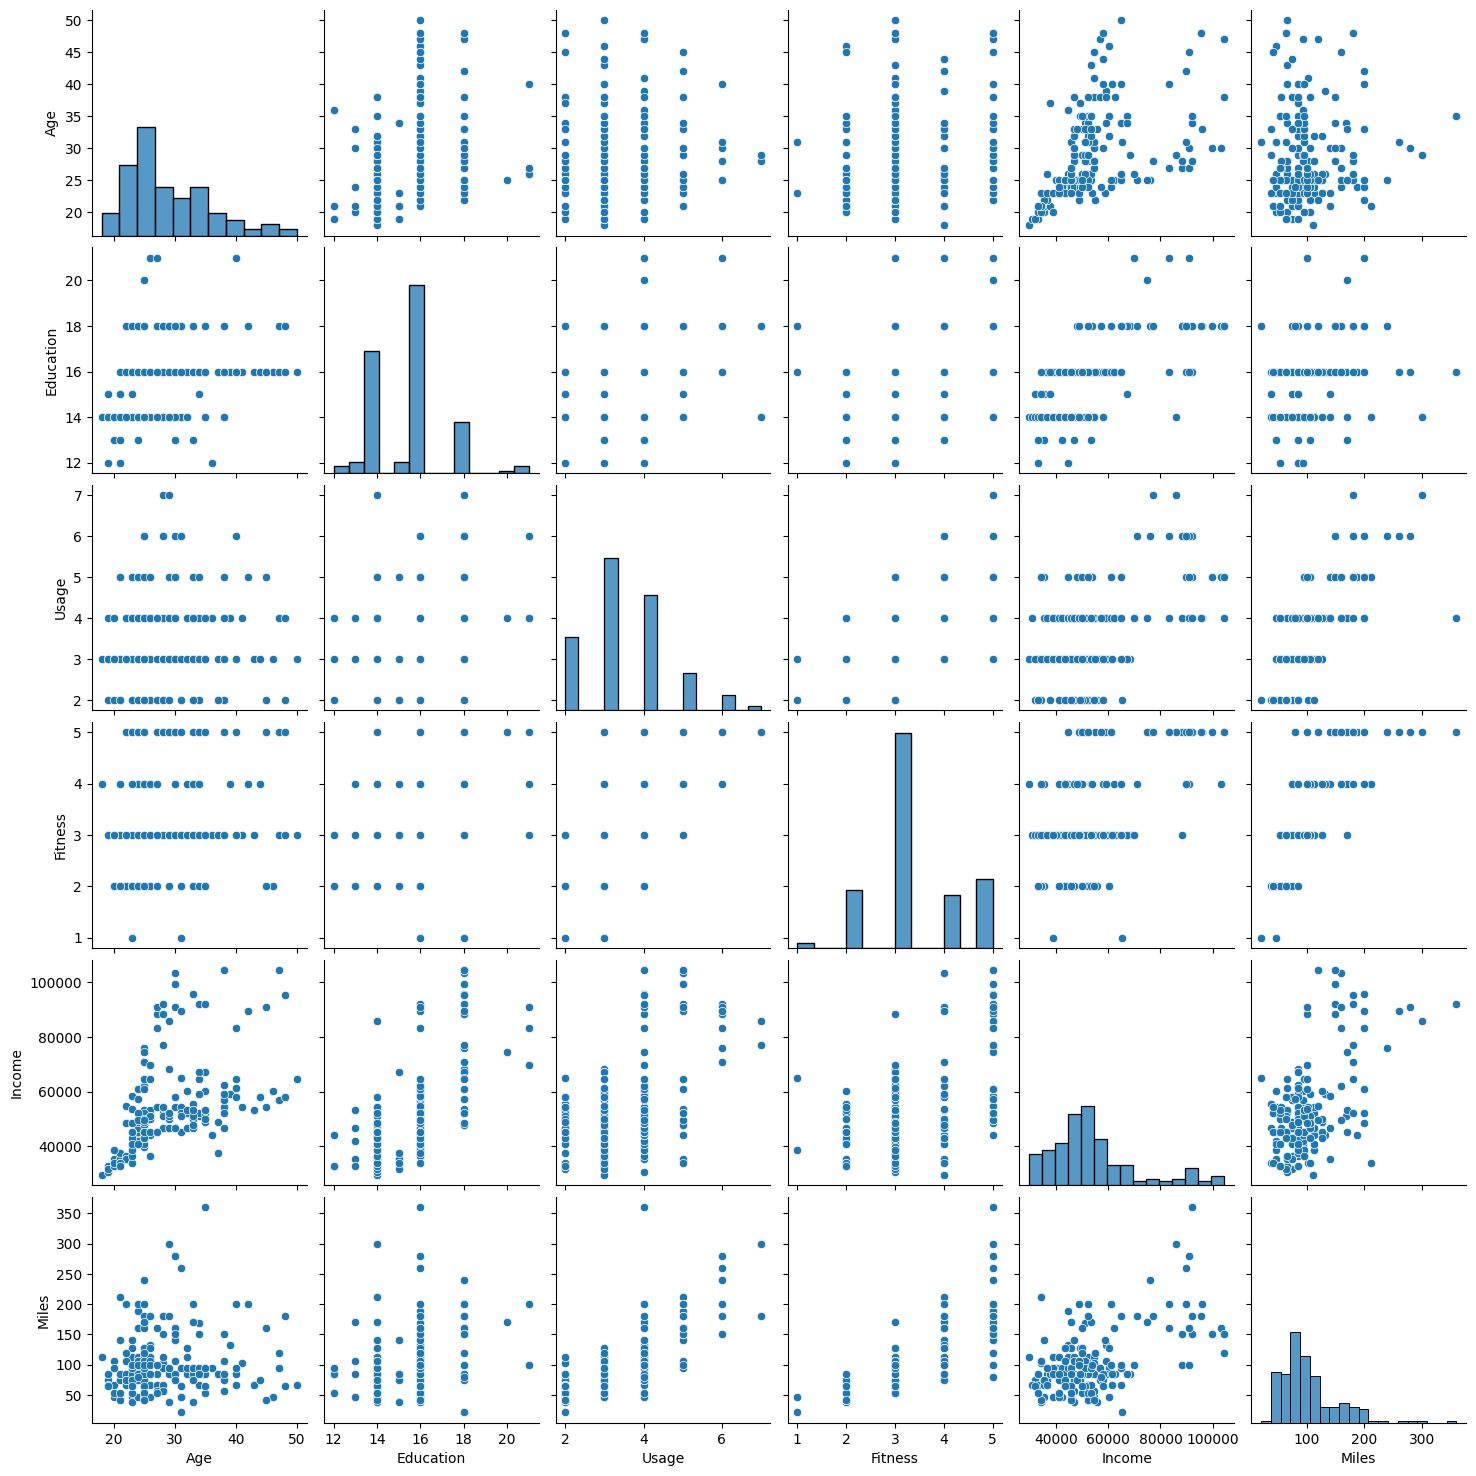

In [ ]:
sns.pairplot(aerofit_df)
plt.show()

It displays relationships between pairs of variables(bivariate) in a dataset and univariate distribution of data along diagonals.

Fitness, Miles and Usage are highly correlated among each other.
Education and Income, Age and Income are highly correlated.

We can see the left skew in numerical data along diagonal.

### Correlation matrix


In [ ]:
aerofit_encoded = pd.get_dummies(aerofit_df, dtype='int')
aerofit_encoded.head(4)

,Age,Education,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,4,29562,112,1,0,0,0,1,0,1
1,19,15,2,3,31836,75,1,0,0,0,1,0,1
2,19,14,4,3,30699,66,1,0,0,1,0,1,0
3,19,12,3,3,32973,85,1,0,0,0,1,0,1


In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

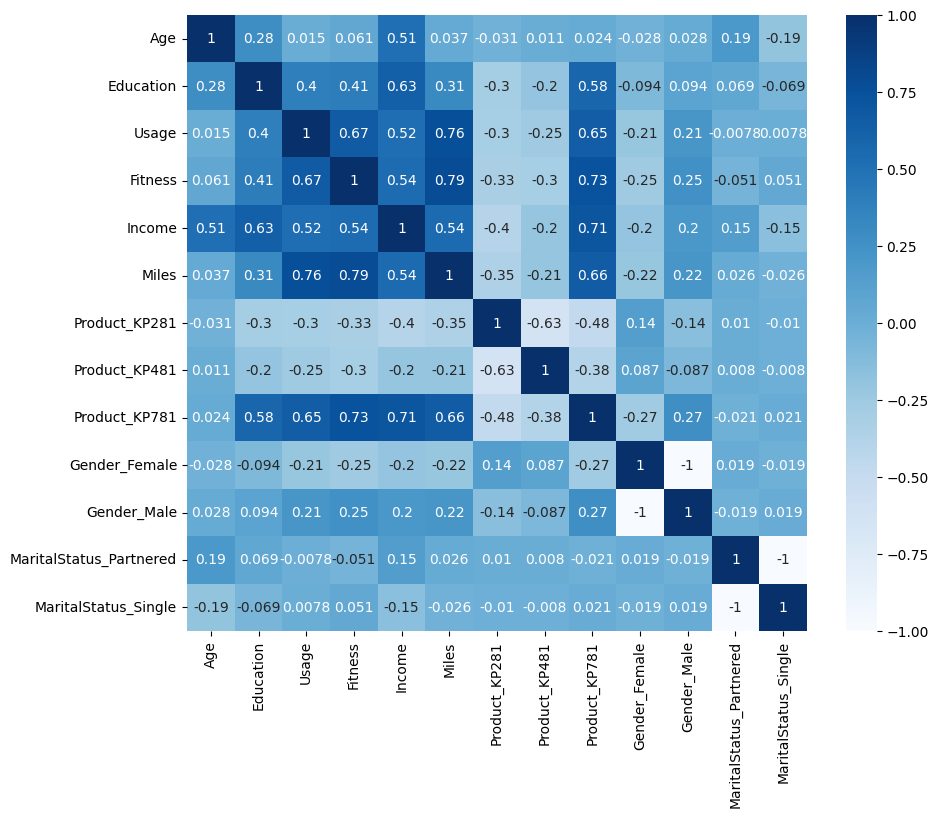

In [ ]:
sns.heatmap(aerofit_encoded.corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
num_corrs = aerofit_df.corr(numeric_only=True)
num_corrs

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


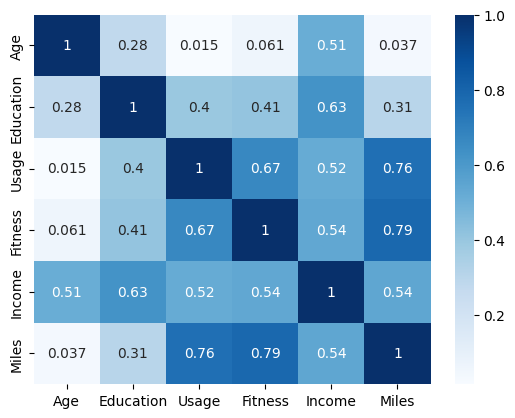

In [ ]:
sns.heatmap(num_corrs, annot=True, cmap='Blues')
plt.show()

Miles and fitness, as well as miles and usage, are highly correlated variables with correlation values of 0.79 and 0.76, respectively.

Fitness and usage have a correlation value of 0.67. These three variables are interrelated, meaning that fitness directly influences the usage and miles a person covers per week, and vice versa.

Next comes education and income with a high correlation value of 0.63.
There is correlation value of 0.51 between income and age. While correlation between age and income is low 0.28

This indicates that as customers' age and level of education increase, their income tends to increase as well, which is generally the case. However, an increase in age does not necessarily mean an increase in education level.

## Visual and Statistical analysis of Customer categorization for each Product
Treadmills are first bought based on Income, then Fitness, Usage, Miles. These are highly correlated among each others.

### Income

In [ ]:
px.histogram(aerofit_df, x="Income", marginal="box", title='Income of customers')

In [ ]:
px.histogram(aerofit_df, x="Income", marginal="box", color='Product', title='Income of customers')

We saw outliers when cosidering only income, but there are no outliers when product is taken into consideration, showing very rich/high salary customers will opt high end model

Median income of Customers buying KP781 is much higher(about 30K more) than Customers buying KP481 and KP281.

i.e 76.56K > [49.46k, 46.61k]

In [ ]:
Income_df = aerofit_df.copy()

In [ ]:
bins = [25000,40000,55000,70000,105000]
labels = ['Low', 'Medium', 'High', 'Very High']
Income_df['Income_Category'] = pd.cut(Income_df['Income'], bins=bins, labels=labels)
Income_df[['Product', 'Income', 'Income_Category']].head(4)

,Product,Income,Income_Category
0,KP281,29562,Low
1,KP281,31836,Low
2,KP281,30699,Low
3,KP281,32973,Low


In [ ]:
crosstab_income_marginal = pd.crosstab(Income_df['Product'], Income_df['Income_Category'], margins=True)
crosstab_income_marginal

Income_Category,Low,Medium,High,Very High,All
Product,,,,,
KP281,23,46,11,0,80
KP481,9,39,12,0,60
KP781,0,9,8,23,40
All,32,94,31,23,180


Here we get marginal probabilities, i.e. Probability(A) as well as Conditional probability i.e. Probability(A and B)

e.g: Probability that customer buys product KP281 is 80/180 ~44.4% as seen ealier

Probability that customer has low income is 32/180 ~17.7%

And, Probability that customer buys product KP281 and has low income is 23/180 ~12.8%

Highest probability of customer buying treadmill are from medium income category, 94/180 ~52.2%

In [ ]:
crosstab_income_conditional = pd.crosstab(Income_df['Product'], Income_df['Income_Category'],
                                          margins=True, normalize='index')
crosstab_income_conditional

Income_Category,Low,Medium,High,Very High
Product,,,,
KP281,0.287500,0.575000,0.137500,0.000000
KP481,0.150000,0.650000,0.200000,0.000000
KP781,0.000000,0.225000,0.200000,0.575000
All,0.177778,0.522222,0.172222,0.127778


We get here, Probability(Income|Product) i.e. probability of Customer's Income given Product. we can use this to target/recommend particular Income group customer to sell the product.

- This shows we should recommend the "Very rich" customer aerofit's high end model, probability that customer buying product "KP781" has "very high" Income is 57.5%.

- Similarly for product KP 481 it should be recommended to medium income customers it has 65% probability that it would be bought by them.

- For product KP 281 it should be recommended to medium income customers it has 57.5% probability that it would be bought by them.

In [ ]:
crosstab_income_conditional2 = pd.crosstab(Income_df['Product'], Income_df['Income_Category'],
                                           margins=True, normalize='columns')
crosstab_income_conditional2

Income_Category,Low,Medium,High,Very High,All
Product,,,,,
KP281,0.71875,0.489362,0.354839,0.0,0.444444
KP481,0.28125,0.414894,0.387097,0.0,0.333333
KP781,0.00000,0.095745,0.258065,1.0,0.222222


We get here, Probability(Product|Income) i.e. probability of Customer buyin a Product given Customer's Income. This can use this to target/recommend the customer a product based on his Income.
- Probability that a low income customer would buy KP 281 is very high 71.88%.
- Chances for medium income would buy KP 281 is 48.9%.
- For high income customers they would mostly buy KP 481 38.7% chance, but not a good recommendation.
- There's hundred percent probability that a very high income customer would buy the high end model KP 781 treadmill. This is one key insight.

### Gender
What is the probability of a male customer buying a KP781 treadmill?
0.183

### Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

<Axes: xlabel='Gender', ylabel='count'>

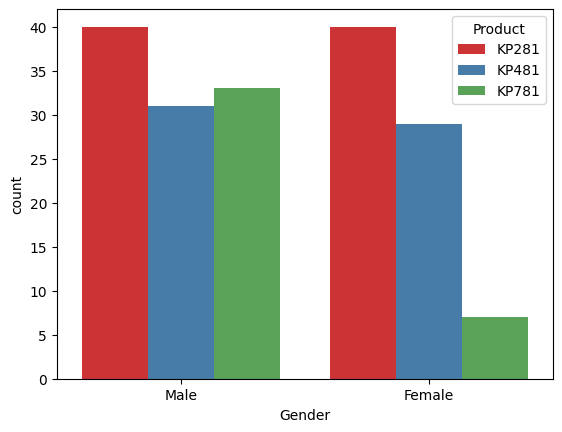

In [ ]:
sns.countplot(x="Gender", hue="Product", data=aerofit_df, palette="Set1")

In [ ]:
crosstab_gender = pd.crosstab(index=aerofit_df['Product'], columns=aerofit_df['Gender'],margins=True,  normalize='columns')
crosstab_gender

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


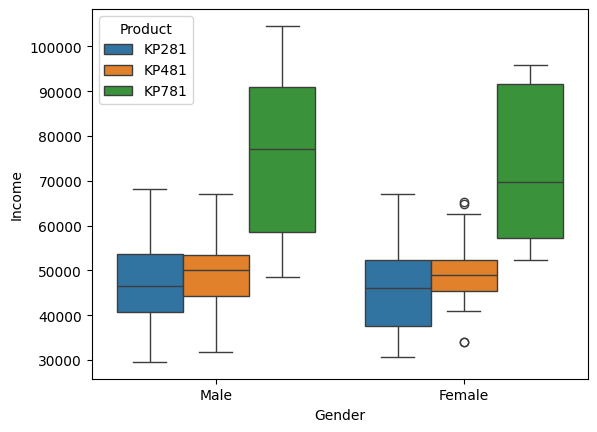

In [ ]:
sns.boxplot(x='Gender', y='Income', hue='Product', data=aerofit_df)
plt.show()

In [ ]:
crosstab_gender_income = pd.crosstab(index=Income_df['Product'],
                                     columns=[Income_df['Gender'], Income_df['Income_Category']],
                                     margins=True,  normalize='columns')
crosstab_gender_income

Gender             Female                           Male                   \
Income_Category       Low    Medium High Very High   Low Medium      High   
Product                                                                     
KP281            0.708333  0.487179  0.4       0.0  0.68   0.42  0.181818   
KP481            0.291667  0.461538  0.4       0.0  0.32   0.40  0.272727   
KP781            0.000000  0.051282  0.2       1.0  0.00   0.18  0.545455   

Gender                          All  
Income_Category Very High            
Product                              
KP281                 0.0  0.444444  
KP481                 0.0  0.333333  
KP781                 1.0  0.222222

Gender base products can be recommended as there is 52% chances for females to buy KP281
For males we cannot directly recommend them any product

For very rich customers be it male or female high end model is highly recommended with 100% probability
Similarly, For low income customers be it male or female, low end model is  recommended. This has 68%, 70% probability respectively.
For medium and high income customers it is difficult to suggest them a product between KP281 & KP481

Gender and mid and high income customer cannot be used to recommend a  particular product between low and mid tier treadmill.

However the box plot gives a slight margin to different between customers buying KP281 and KP481. As Customers buying KP481 are having slightly higher median income then Customers buying KP281.

[]

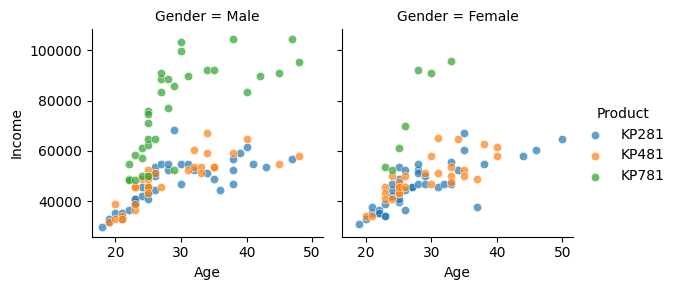

In [ ]:
g = sns.FacetGrid(aerofit_df, col="Gender", hue="Product")
g.map(sns.scatterplot, "Age", "Income", alpha=.7)
g.add_legend()
plt.plot()

Even Cuustomer's Age with Gender and Income can't be used to seperate the low and mid tier treadmill's probability/likelyhood of purchase.

### Education

In [ ]:
 px.histogram(aerofit_df, x="Education", marginal="box", color='Product', title='Education level of Customer with Product bought')

In [ ]:
crosstab_education = pd.crosstab(aerofit_df['Product'], aerofit_df['Education'],
                                 margins=True,  normalize='columns')
crosstab_education

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0,0.444444
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0,0.333333
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0,0.222222


Above cross table provides, Probability(Product|Education) i.e. probability of Customer buying a product given Customer's Education level. This can use this to target/recommend the customer a product based on his Education level.

Education and income are highly correlated it is also reflected in product purchase. As education in year cross 16, the probability of the customer buying the high end treadmill increases from 17% to  80% to 100%.

There is a differentiating factor here for low and mid tier treadmill.
In india education level 13 indicates the cutomer had opted for diploma after completing his 10th in High school rather than general opting for 12th in Arts, Commerce or Science. And Education level 15 is for customers who opted for 3 year bachelors degree.
For customers with either of two education level, we could asume they would prefer low and model KP 281 with the probability of 60% and 80% for education level 13 and 15 respectively.

### Age

In [ ]:
age_df = Income_df.copy()
age_df.sample(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Category
26,KP281,24,Female,16,Single,4,3,46617,75,Medium
71,KP281,38,Male,16,Partnered,3,3,56850,75,High
68,KP281,38,Male,16,Partnered,3,3,46617,75,Medium


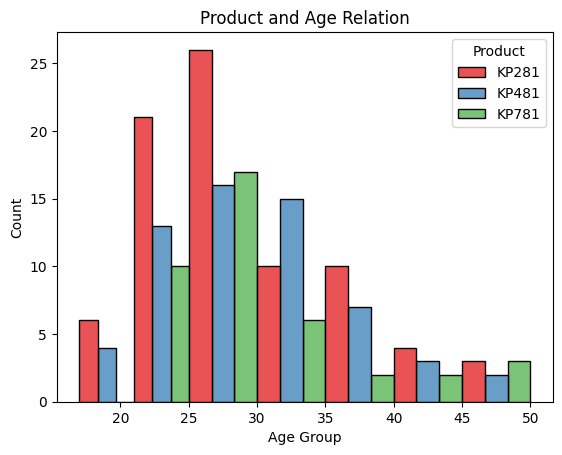

In [ ]:
sns.histplot(age_df, x='Age', hue='Product', bins=[17,21,25,30,35,40,45,50],
             multiple='dodge', palette='Set1')
plt.title('Product and Age Relation')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
bins = [17,21,25,30,35,40,45,50]
labels = ['18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50']
age_df['Age_groups'] = pd.cut(age_df['Age'], bins=bins, labels=labels)
age_df[['Product', 'Age', 'Age_groups']].head(4)
# age_df.head()

,Product,Age,Age_groups
0,KP281,18,18-21
1,KP281,19,18-21
2,KP281,19,18-21
3,KP281,19,18-21


In [ ]:
age_group_df =  age_df.groupby(['Product', 'Age_groups']).agg(count=('Age_groups','count'))
age_group_df.head(4)

count
Product Age_groups       
KP281   18-21          10
        22-25          24
        26-30          21
        31-35          11

In [ ]:
crosstab_age = pd.crosstab(index=age_df.Product, columns=age_df.Age_groups)
crosstab_age

Age_groups,18-21,22-25,26-30,31-35,36-40,41-45,46-50
Product,,,,,,,
KP281,10,24,21,11,8,3,3
KP481,7,21,7,17,6,1,1
KP781,0,17,13,4,2,2,2


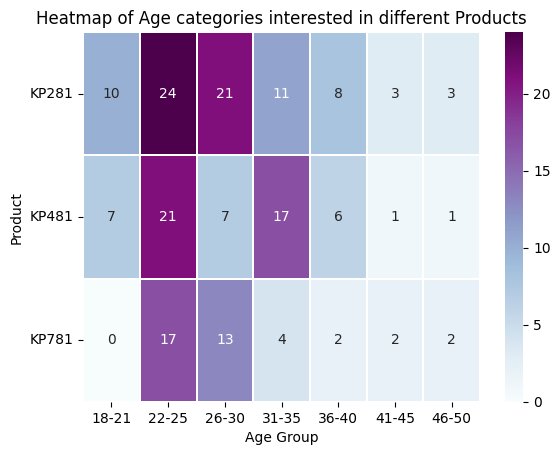

In [ ]:
sns.heatmap(crosstab_age, annot=True, fmt="d", cmap="BuPu", linewidth=0.25)
plt.title('Heatmap of Age categories interested in different Products')
plt.xlabel('Age Group')
plt.ylabel('Product')
plt.yticks(rotation=0)
plt.show()


Probability of customer being aged between "31-35" and buying a "KP481" is 17/180 about 9.4%.

Probability of customer buying a "KP481" is aged between "31-35" is 17/32 about 53.12%.

KP481 is a good recommendation for customers aged between 31-35.

In [ ]:
crosstab_age_given_product = pd.crosstab(index=age_df.Product, columns=age_df.Age_groups,  normalize="index")
crosstab_age_given_product

Age_groups,18-21,22-25,26-30,31-35,36-40,41-45,46-50
Product,,,,,,,
KP281,0.125000,0.300,0.262500,0.137500,0.10,0.037500,0.037500
KP481,0.116667,0.350,0.116667,0.283333,0.10,0.016667,0.016667
KP781,0.000000,0.425,0.325000,0.100000,0.05,0.050000,0.050000


In [ ]:
crosstab_product_given_age = pd.crosstab(index=age_df.Product, columns=age_df.Age_groups,  normalize="columns")
crosstab_product_given_age

Age_groups,18-21,22-25,26-30,31-35,36-40,41-45,46-50
Product,,,,,,,
KP281,0.588235,0.387097,0.512195,0.34375,0.500,0.500000,0.500000
KP481,0.411765,0.338710,0.170732,0.53125,0.375,0.166667,0.166667
KP781,0.000000,0.274194,0.317073,0.12500,0.125,0.333333,0.333333


From the above two cross tabs, the inferences we can make are as follows. For treadmil KP281 the probability of customer age 22 to 25 would buy is 30% highest.

For treadmill KP481 the highest chances of buying is 35% for customer age 22-25.

For treadmill KP781 there are 42.5% probability that the customer buying it is aged between 22-25.

Given customer age between 22-25, probability of customer buying KP781 is 27.4% which is less than probability of customer buying KP481 i.e 33.8%. But, the probability of customer buying KP281 is 38.7% greater than both. Hence recommendatation KP281 would be better than others.   

Based on age there is only one good recommendation that is for customers aged between 31-35, 53.1% probability of buying KP481.

Otherwise there 50% chance or higher for all the age categories to buy the low end model KP 281 treadmill.

Out of which, recommending KP281 to Customers aged between 18-21 is good at 58.8% probabilty of him/her buying it.

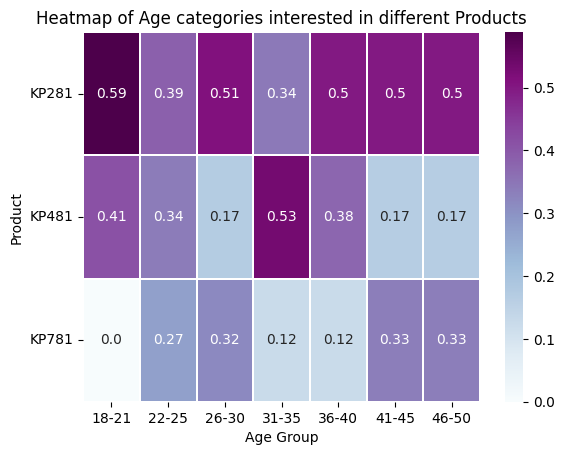

In [ ]:
sns.heatmap(crosstab_product_given_age, annot=True, fmt=".02", cmap="BuPu", linewidth=0.25)
plt.title('Heatmap of Age categories interested in different Products')
plt.xlabel('Age Group')
plt.ylabel('Product')
plt.yticks(rotation=0)
plt.show()

### Marital Status

In [ ]:
MaritalStatus =  aerofit_df.groupby(['Product', 'MaritalStatus']).agg(count=('MaritalStatus','count'))
MaritalStatus

count
Product MaritalStatus       
KP281   Partnered         48
        Single            32
KP481   Partnered         36
        Single            24
KP781   Partnered         23
        Single            17

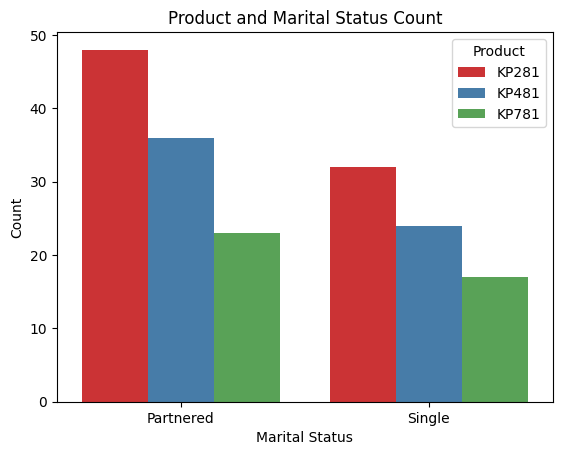

In [ ]:
sns.barplot(MaritalStatus, x='MaritalStatus', y='count', hue='Product', palette="Set1")
plt.title('Product and Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [ ]:
crosstab_percent1 = pd.crosstab(index=aerofit_df['Product'], columns=aerofit_df['MaritalStatus'],
                                margins=True, normalize='index')
crosstab_percent1

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [ ]:
crosstab_percent2 = pd.crosstab(index=aerofit_df['Product'], columns=aerofit_df['MaritalStatus'],
                                margins=True,  normalize='columns')
crosstab_percent2

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


Partnered ones are more like to purchase treadmills then singles, the ratio is 6/4 across all product categories.

Based on marital status partnered and single are both more likely to purchase the low end treadmill KP281 with 44.8% and 43.8% probability.

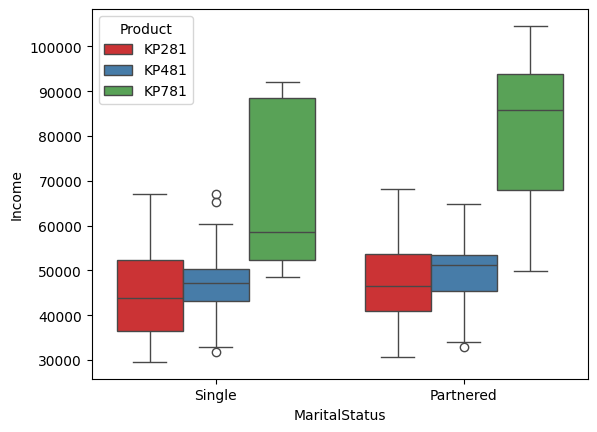

In [ ]:
sns.boxplot(x="MaritalStatus", y="Income", hue="Product", data=aerofit_df, palette="Set1")
plt.show()

In [ ]:
crosstab_maritalstatus_income = pd.crosstab(index=Income_df['Product'],
                                     columns=[Income_df['MaritalStatus'], Income_df['Income_Category']],
                                     margins=True,  normalize='columns')
crosstab_maritalstatus_income

MaritalStatus   Partnered                           Single            \
Income_Category       Low    Medium  High Very High    Low    Medium   
Product                                                                
KP281            0.647059  0.547170  0.40       0.0    0.8  0.414634   
KP481            0.352941  0.433962  0.35       0.0    0.2  0.390244   
KP781            0.000000  0.018868  0.25       1.0    0.0  0.195122   

MaritalStatus                             All  
Income_Category      High Very High            
Product                                        
KP281            0.272727       0.0  0.444444  
KP481            0.454545       0.0  0.333333  
KP781            0.272727       1.0  0.222222

Marital status paired with income shows more or less the same distribution as with gender. Here also the distribution is based mostly on income, higher income means that the customer will buy high end model KP781.

Also median income of customers buying KP481 is higher than KP281 be it partnered or single.

100% probability for very high income category customers be it partnered or single.

Other high probability is for low income category customers to buy KP281 treadmill which is 64.7% and 80% for partnered and single respectively.

For KP481, Singles with high income category are having 45.5% probability of buying this treadmill.

### Miles

In [ ]:
 px.histogram(aerofit_df, x="Miles", marginal="box", color='Product', title='Avg no. of Miles- Expected by customers')

Considering 10 miles per day covered on treadmill equals to 70 miles per week,
which is greater than average  miles covered between 3.5 to 6.5 per day
Our customers have surely biased their "miles per week" estimate.
We will consider everything about 140 miles has very high miles covered per week
Under this we will categorise the miles covered into low medium and high binning 0 to 60, 60 to 100 and 100 to 140 respectively.

In [ ]:
miles_df = age_df.copy()
bins = [0,60,100,140,380]
labels = ['Low', 'Medium', 'High', 'Very High']
miles_df['Miles_Category'] = pd.cut(miles_df['Miles'], bins=bins, labels=labels)
miles_df[['Product', 'Miles', 'Miles_Category']].head(4)

,Product,Miles,Miles_Category
0,KP281,112,High
1,KP281,75,Medium
2,KP281,66,Medium
3,KP281,85,Medium


In [ ]:
crosstab_miles = pd.crosstab(miles_df['Product'], miles_df['Miles_Category'],
                                          margins=True, normalize='index')
crosstab_miles

Miles_Category,Low,Medium,High,Very High
Product,,,,
KP281,0.225000,0.550000,0.175000,0.050000
KP481,0.200000,0.533333,0.216667,0.050000
KP781,0.000000,0.200000,0.125000,0.675000
All,0.166667,0.466667,0.177778,0.188889


In [ ]:
crosstab_miles = pd.crosstab(miles_df['Product'], miles_df['Miles_Category'],
                                          margins=True, normalize='columns')
crosstab_miles

Miles_Category,Low,Medium,High,Very High,All
Product,,,,,
KP281,0.6,0.523810,0.43750,0.117647,0.444444
KP481,0.4,0.380952,0.40625,0.088235,0.333333
KP781,0.0,0.095238,0.15625,0.794118,0.222222


Analysing about to cross tabs on miles category few high probability are for, product given KP281 the highest probability is for medium expected miles customer is 55%

Given product KP481 again the highest probability is for medium expected miles customer which is 53.3%

Given product KP781 the highest probability is for very high expected miles customer which is 67.5%

Given low expected miles customer is probably gonna buy KP281 treadmill with 60% chances

Medium expected miles customer they are  also likely to purchase KP281 treadmill with 52.3%

For very high expected miles customer there is 79.4% probability they are gonna by high end treadmill KP781

### Fitness

In [ ]:
# plt.rcParams['figure.figsize'] = [6.4, 4.8]

<Axes: xlabel='Fitness', ylabel='count'>

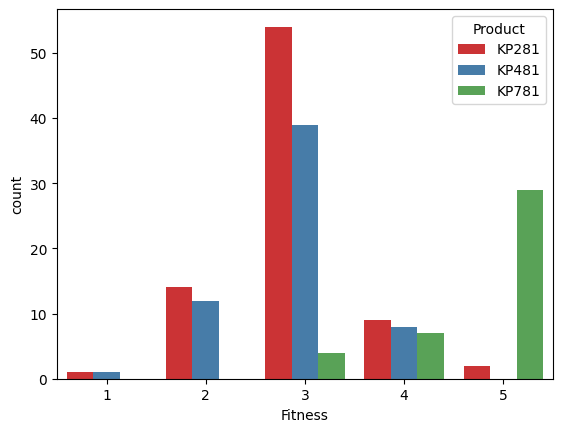

In [ ]:
sns.countplot(x='Fitness', hue='Product', data=aerofit_df, palette="Set1")

In [ ]:
crosstab_fitness = pd.crosstab(miles_df['Product'], miles_df['Fitness'], margins=True)
crosstab_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


There is a high percent probability of the customer with fitness of level 3 to buy treadmill which is 53.8%

In [ ]:
crosstab_fitness_given_product = pd.crosstab(miles_df['Product'], miles_df['Fitness'], margins=True, normalize="index")
crosstab_fitness_given_product

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012500,0.175000,0.675000,0.112500,0.025000
KP481,0.016667,0.200000,0.650000,0.133333,0.000000
KP781,0.000000,0.000000,0.100000,0.175000,0.725000
All,0.011111,0.144444,0.538889,0.133333,0.172222


Customer buying treadmill given the product KP281 and KP481 the probability that customer with fitness level 3 will buy is 67.5% and 65% respectively.

And for product KP781 there is very high probability of 72.5% that it would be bought by customer with fitness level 5.

In [ ]:
crosstab_product_given_fitness = pd.crosstab(miles_df['Product'], miles_df['Fitness'], margins=True, normalize="columns")
crosstab_product_given_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516,0.444444
KP481,0.5,0.461538,0.402062,0.333333,0.000000,0.333333
KP781,0.0,0.000000,0.041237,0.291667,0.935484,0.222222


One solid prediction given customer fitness level is for fitness level 5 that they would buy KP781 is 93.5% probability.

Among fitness level 3 customers, which has the highest number of customers. The probability is more for them to buy KP281 product 55.67% then they would buy KP 481 product 40.2%.

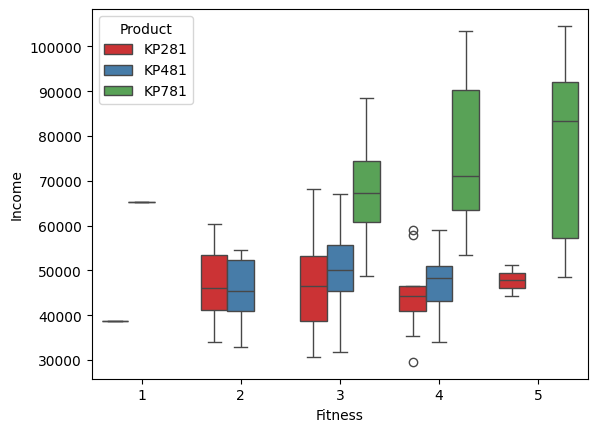

In [ ]:
sns.boxplot(x="Fitness", y="Income", hue="Product", data=aerofit_df, palette="Set1")
plt.show()

Box plot between fitness and income for each product again shows the same bias, that the customer with any given fitness level higher the income the greater is that they would buy KP781 treadmill.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


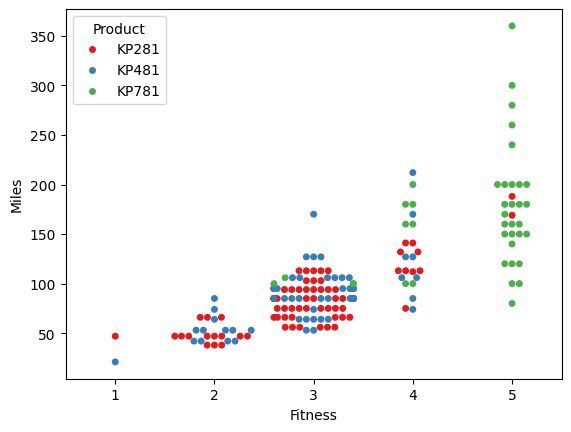

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.swarmplot(x="Fitness", y="Miles", hue="Product", data=aerofit_df,
              size=5, palette="Set1")
plt.show()

Scatter plot between my and fitness for each product shows that more number of customers prefer KP781 with increasing fitness level.

This can also be seen in below scatter plot, which plots for both usage and miles, given fitness level.

[]

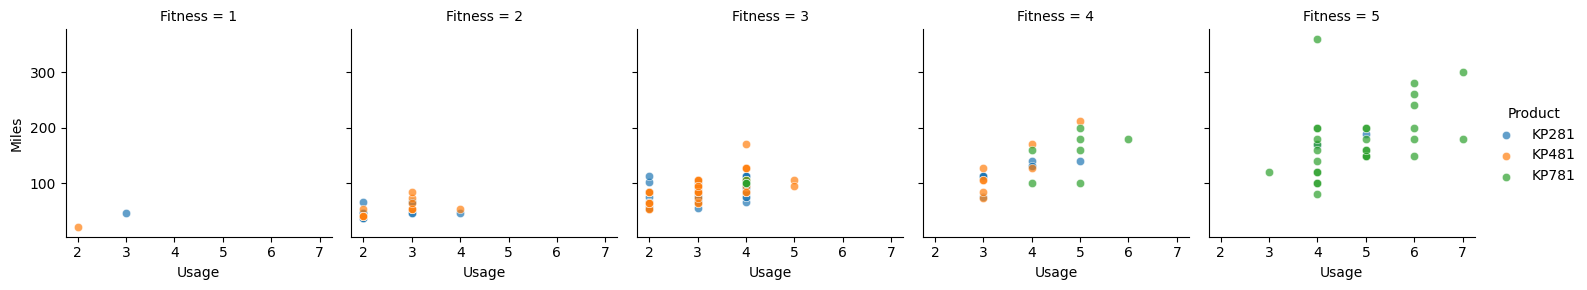

In [ ]:
g = sns.FacetGrid(aerofit_df, col="Fitness", hue="Product")
g.map(sns.scatterplot, "Usage", "Miles", alpha=.7)
g.add_legend()
plt.plot()

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
crosstab_fitness_usage = pd.crosstab(aerofit_df['Product'], [aerofit_df['Fitness'], aerofit_df['Usage']],
                                     margins=True, normalize='index')
crosstab_fitness_usage

Fitness         1                   2                             3            \
Usage           2         3         2         3         4         2         3   
Product                                                                         
KP281    0.000000  0.012500  0.112500  0.050000  0.012500  0.125000  0.337500   
KP481    0.016667  0.000000  0.083333  0.100000  0.016667  0.133333  0.333333   
KP781    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All      0.005556  0.005556  0.077778  0.055556  0.011111  0.100000  0.261111   

Fitness                             4                                       5  \
Usage           4         5         3         4         5         6         3   
Product                                                                         
KP281    0.212500  0.000000  0.062500  0.037500  0.012500  0.000000  0.000000   
KP481    0.150000  0.033333  0.083333  0.033333  0.016667  0.000000  0.000000   
KP781    0.100000  0.000000  0.000000  0.050000  0.100000  0.025000  0.025000   
All      0.166667  0.011111  0.055556  0.038889  0.033333  0.005556  0.005556   

Fitness                                        
Usage           4       5         6         7  
Product                                        
KP281    0.012500  0.0125  0.000000  0.000000  
KP481    0.000000  0.0000  0.000000  0.000000  
KP781    0.300000  0.2000  0.150000  0.050000  
All      0.072222  0.0500  0.033333  0.011111

Given product KP281, for fitness level 4 and usage weekly thrice the customer is expected to buy with probability of 33.7%
Same is for product KP481 with 33.3%

And 30% probability that the product KP781 bought by customer will have fitness level 5 and usage per week 4.

### Usage

<Axes: xlabel='Usage', ylabel='Density'>

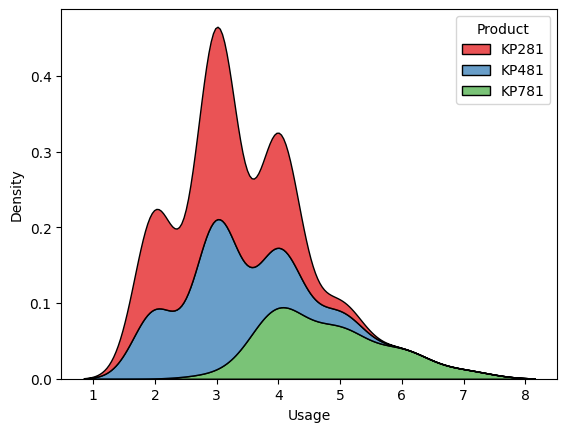

In [ ]:
sns.kdeplot(aerofit_df, x='Usage', hue='Product', palette='Set1', multiple="stack")
plt.plot()

In [ ]:
crosstab_usage = pd.crosstab(aerofit_df['Product'], aerofit_df['Usage'], margins=True)
crosstab_usage

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


The probability of customer's treadmill usage per weekend reduces from 3 to 7. It goes from 38.3% to 28.8% to 9.4% to 3.8% to 1.1%.

In [ ]:
crosstab_usage_given_product = pd.crosstab(aerofit_df['Product'], aerofit_df['Usage'], margins=True, normalize='index')
crosstab_usage_given_product

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275000,0.025000,0.000000,0.000000
KP481,0.233333,0.516667,0.200000,0.050000,0.000000,0.000000
KP781,0.000000,0.025000,0.450000,0.300000,0.175000,0.050000
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111


In [ ]:
crosstab_education_usage = pd.crosstab(aerofit_df['Product'], [aerofit_df['Education'], aerofit_df['Usage']], normalize="index")
crosstab_education_usage

Education        12                     13                  14            \
Usage             2       3       4      3         4         2         3   
Product                                                                    
KP281      0.000000  0.0125  0.0125  0.025  0.012500  0.137500  0.175000   
KP481      0.016667  0.0000  0.0000  0.000  0.033333  0.066667  0.233333   
KP781      0.000000  0.0000  0.0000  0.000  0.000000  0.000000  0.000000   

Education                               15                          16         \
Usage           4         5      7       2         3       5         2      3   
Product                                                                         
KP281      0.0625  0.000000  0.000  0.0375  0.000000  0.0125  0.062500  0.225   
KP481      0.0500  0.033333  0.000  0.0000  0.016667  0.0000  0.133333  0.250   
KP781      0.0250  0.000000  0.025  0.0000  0.000000  0.0000  0.000000  0.025   

Education                                  18                               \
Usage             4         5     6         2         3      4      5    6   
Product                                                                      
KP281      0.187500  0.012500  0.00  0.000000  0.025000  0.000  0.000  0.0   
KP481      0.116667  0.016667  0.00  0.016667  0.016667  0.000  0.000  0.0   
KP781      0.175000  0.125000  0.05  0.000000  0.000000  0.175  0.175  0.1   

Education            20    21         
Usage          7      4     4      6  
Product                               
KP281      0.000  0.000  0.00  0.000  
KP481      0.000  0.000  0.00  0.000  
KP781      0.025  0.025  0.05  0.025

- Probability of usage given product

For KP281 and KP481 the highest probability is for 3 times the week usage with 46.2% and 51.6% respectively.

For KP781 the highest probability is for 4 times a week usage 45%

There is 22.5% and 25% probability that customer would have 16 year education and usage per week is 3 for both products KP281 and KP481 respectively

For product KP 781 there is 17.5% and 12.5% probability that customer would be educated 16 years and would be using 3 and 4 times a week respectively.

Also there is 17.5% probability for kp781 that the customer would be educated 18 years and would be using 4 or even 5 times per week.

[]

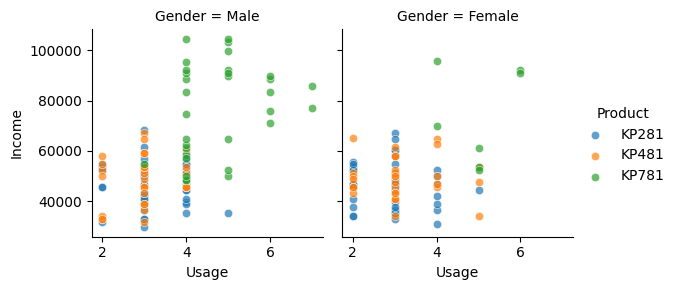

In [ ]:
g = sns.FacetGrid(aerofit_df, col="Gender", hue="Product")
g.map(sns.scatterplot, "Usage", "Income", alpha=.7)
g.add_legend()
plt.plot()

Given gender usage and income of customer there is little to separate KP281 and KP481 but males prefer high end model with usage more than 4 per week.

## Recommendations

**Income** is definitely the **key** point in differentiating the high end model with low and mid end models.

1. Income greater than **70000** are certain to buy **KP781** treadmill
While median income of 46000 are to buy KP281 and median income of 50 are to buy KP481.
2. For product KP281 and KP481 is better to recommended to **medium income** category customer. Product KP781 to very high income

3. **Males** are more likely to buy **KP781** then females

4. Median **education level** for both customers buying KP281 and KP481 is **16** and that of customers buying KP781 is **18**

5. Given age **31 to 35** the customer is more likely to buy **KP481 53%**.
6. **30%** of the **customers** are of age **22 to 25**, there is small margin to differentiate between them buying each product. Slightly more chances of buying low end and less for high end.

7. **Marital status** shows that there is **60%** chances that partnered customer will buy product/treadmill then singles.
8. Like age there is a **decreasing trend** from low end to high end for both patterned and singles but with visible margin, about **44% to 22%** on an average.

9. Like income expected **miles** per week are also **very high** for customers buying KP781.

10. Customers with **fitness level 3** are more likely to buy treadmills, and these  customers are likely to buying KP281 or KP481
11. For fitness level 5 in the customer is about 93% likely to buy treadmill KP781.

12. Treadmills are mostly been used for** 3 to 4 times a week**, among these they are likely to buy low and mid end treadmill

13. Customers with **high usage** that is 4-7 times a week are likely to buy **high end treadmill**.

### Future Work
1) Analysing more key differences between KP281 and KP481 treadmill.

2) There are total 21 and 35 combinations for bivarate and trivariate analysis respectively to explore!